In [3]:
# load library
from datetime import datetime
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [4]:
# load data
csv_file = "Data/creditcard.csv"
csv_data = pd.read_csv(csv_file, low_memory = False)
Credit_card = pd.DataFrame(csv_data)

In [5]:
Credit_card.groupby('Class')[['Class']].count()

,Class
Class,
0,284315
1,492


In [6]:
# scale time and amount

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler


std_scaler = StandardScaler()
rob_scaler = RobustScaler()

Credit_card['scaled_amount'] = rob_scaler.fit_transform(Credit_card['Amount'].values.reshape(-1,1))
Credit_card['scaled_time'] = rob_scaler.fit_transform(Credit_card['Time'].values.reshape(-1,1))

In [7]:
Credit_card.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = Credit_card['scaled_amount']
scaled_time = Credit_card['scaled_time']

Credit_card.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
Credit_card.insert(0, 'scaled_amount', scaled_amount)
Credit_card.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

Credit_card.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
df_x = Credit_card.iloc[:,:-1]
Class = Credit_card.iloc[:,-1]
## Randomly split the data
X_train, X_test, y_train, y_test = train_test_split(df_x, Class, test_size=0.2, random_state=3)

In [9]:
len(y_test)

56962

### XGB

In [8]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.8461538461538461
Accuracy rate:  0.9995084442259752


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.77      0.85       100

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### DGB

In [12]:
model_GDB = GradientBoostingClassifier()
model_GDB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:

y_pred = model_GDB.predict(X_test)
y_pred_proba = model_GDB.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.6193548387096774
Accuracy rate:  0.9989642217618764


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.87      0.48      0.62       100

    accuracy                           1.00     56962
   macro avg       0.94      0.74      0.81     56962
weighted avg       1.00      1.00      1.00     56962



### see XGB importance feature

In [11]:
Columns_name = list(X_train.columns)
# feature_importances_  
importances = clf.feature_importances_
print("Importances：",importances)
# Change into dataframe for easier further maniputation 
Columns_name = pd.DataFrame(Columns_name)
importances= pd.DataFrame(importances)
# rename
Columns_name.rename(columns={0:'Columns name'},inplace = True)
importances.rename(columns={0:'importances'},inplace = True)

df_import = pd.concat([Columns_name,importances], axis=1)

Importances： [0.01263058 0.01633259 0.02373566 0.01360122 0.02144281 0.0305224
 0.01857734 0.01563578 0.02650291 0.0189287  0.01225543 0.05385268
 0.01569386 0.02416494 0.019588   0.06004884 0.01895406 0.01719481
 0.38603067 0.02419632 0.01306598 0.01592358 0.01893477 0.01130698
 0.01467286 0.0152871  0.01373813 0.02444574 0.02947123 0.0132639 ]


In [14]:
# Order the important from higher values to smaller values
df_import = df_import.sort_values(by ='importances',ascending = False)
df_import.iloc[0:10,]

,Columns name,importances
18,V17,0.272952
13,V12,0.139900
15,V14,0.139553
11,V10,0.089139
8,V7,0.073872
21,V20,0.055923
5,V4,0.052469
4,V3,0.045629
27,V26,0.042645
29,V28,0.035655


## Random UnderSampling technique
### avoid imbalance data and hope increasing the accracy in fraud case

In [12]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827953 0.00172047]
[0.99824444 0.00175556]


In [13]:
Credit_card = Credit_card.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = Credit_card.loc[Credit_card['Class'] == 1]
non_fraud_df = Credit_card.loc[Credit_card['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
245363,1.170684,0.799199,1.790930,-0.240430,-1.675534,1.389349,0.207745,-0.875449,0.566065,-0.214348,...,-0.195768,0.148093,0.322911,-0.070732,-0.014347,0.328102,-0.517286,-0.046950,-0.057782,0
201601,1.512052,0.578790,0.523820,1.531708,-4.176390,3.584615,-1.023954,-0.502471,-1.891966,0.878417,...,0.621804,0.851859,1.176927,0.453553,0.485211,-0.500687,-0.108284,0.269477,-0.063245,1
117092,-0.279746,-0.119339,1.255641,0.327694,0.298430,0.697195,-0.404281,-1.081899,0.062537,-0.183395,...,-0.103499,-0.291627,-0.859557,0.133538,0.335495,0.203784,0.095592,-0.025470,0.030083,0
251866,-0.252917,0.832282,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,...,0.461032,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,1
8842,-0.307413,-0.852912,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,...,-0.158971,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


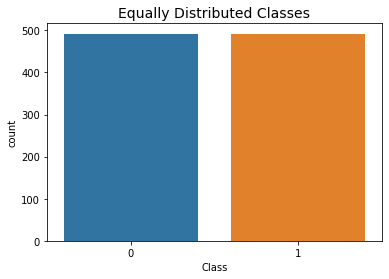

In [14]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### use new dataset and train XGB

In [15]:
X_train_new = new_df.iloc[:,:-1]
y_train_new = new_df.iloc[:,-1]

In [17]:
clf_new = XGBClassifier()
clf_new.fit(X_train_new, y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:

y_pred = clf_new.predict(X_test)
y_pred_proba = clf_new.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
fpr_1,tpr_1,threshold = roc_curve(y_test, y_pred_proba[:,1]) ### FPR TPR
roc_auc_1 = auc(fpr_1,tpr_1)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.08635578583765113
Accuracy rate:  0.9628524279344124


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56862
           1       0.05      1.00      0.09       100

    accuracy                           0.96     56962
   macro avg       0.52      0.98      0.53     56962
weighted avg       1.00      0.96      0.98     56962



### Conclusion: Cannot get a good result by using RUS

## Random overSampling technique

In [1]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [28]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(df_x, Class)

In [29]:
y1 = pd.DataFrame(y)

In [30]:
y1.groupby('Class')[['Class']].count()

,Class
Class,
0,284315
1,284315


In [31]:
## Randomly split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [32]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.999666964645668
Accuracy rate:  0.9996658635668185


In [39]:
print(classification_report(y_test, y_pred,digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.999330  0.999665     56694
           1   0.999334  1.000000  0.999667     57032

    accuracy                       0.999666    113726
   macro avg   0.999667  0.999665  0.999666    113726
weighted avg   0.999666  0.999666  0.999666    113726



### Conclusion: the result shows that after using ROC, our model performance looks great.

## Turn parameter based on cross validation

In [41]:
## Set the initial parameter
model = XGBClassifier(learning_rate=0.300000012,
                      n_estimators=100,           
                      max_depth=6,               
                      min_child_weight = 1,      
                      gamma=0.,                  
                      subsample= 1,                   
                      scale_pos_weight=1,        
                      random_state=0,
                      )

In [42]:
param_test = {
    'n_estimators': list(range(100, 300,100)),
    'max_depth': list(range(5, 8, 1)),
    'learning_rate':  [0.1,0.2,0.300000012]
}
grid_search = GridSearchCV(estimator = model, param_grid = param_test, 
scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0.0,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.300000012,
                                     max_delta_step=None, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=1,
                          

In [ ]:
? warning: if you want to run the code chunk below. You should run about 2 hours

In [43]:
grid_search.cv_results_, grid_search.best_params_, grid_search.best_score_

({'mean_fit_time': array([ 41.53203907,  89.56298556,  48.91545844,  87.71751547,
          50.78208756, 101.66982293,  37.0730566 ,  70.72200685,
          43.20697765,  79.13098245,  47.95204   ,  89.08022237,
          34.14792237,  66.0519372 ,  40.33389707,  74.13720574,
          45.15862498,  82.62068501]),
  'std_fit_time': array([ 1.2152014 , 10.43434933,  5.3316885 ,  2.47876532,  2.21768201,
          3.7613283 ,  3.21737596,  5.59384889,  2.00858052,  0.50610887,
          0.56939002,  1.31210661,  0.31774497,  0.4369143 ,  0.63402898,
          1.26438456,  0.36187056,  1.99139073]),
  'mean_score_time': array([0.19448767, 0.29588227, 0.18104491, 0.28310313, 0.17785764,
         0.31260161, 0.16355901, 0.24713173, 0.17718859, 0.25891294,
         0.19072585, 0.28387289, 0.16009808, 0.23981962, 0.16760445,
         0.24911146, 0.18172922, 0.28073945]),
  'std_score_time': array([0.01993381, 0.02081845, 0.01386962, 0.02705434, 0.00358533,
         0.02052486, 0.00867536, 0.0

In [44]:
clf = XGBClassifier(learning_rate=0.2,
                      n_estimators=200,           
                      max_depth= 7,               
                      min_child_weight = 1,      
                      gamma=0.,                  
                      subsample= 1,                   
                      scale_pos_weight=1,        
                      random_state=0,         
                      )
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
f1_sco = f1_score(y_test,y_pred)
auc_score = accuracy_score(y_test,y_pred)
print("F1 score: ", f1_sco)
print("Accuracy rate: ", auc_score)

F1 score:  0.9997545840199138
Accuracy rate:  0.9997537942071294


In [48]:
print(classification_report(y_test, y_pred,digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.999506  0.999753     56694
           1   0.999509  1.000000  0.999755     57032

    accuracy                       0.999754    113726
   macro avg   0.999755  0.999753  0.999754    113726
weighted avg   0.999754  0.999754  0.999754    113726



In [49]:
Columns_name = list(X_train.columns)
# feature_importances_  
importances = clf.feature_importances_
print("Importances：",importances)
# Change into dataframe for easier further maniputation 
Columns_name = pd.DataFrame(Columns_name)
importances= pd.DataFrame(importances)
# rename
Columns_name.rename(columns={0:'Columns name'},inplace = True)
importances.rename(columns={0:'importances'},inplace = True)

df_import = pd.concat([Columns_name,importances], axis=1)

Importances： [0.01476339 0.01096184 0.01289754 0.00882999 0.01310493 0.05381585
 0.01139669 0.00571928 0.00970536 0.03096063 0.01255684 0.01538373
 0.01069947 0.02413362 0.01575773 0.632163   0.00682736 0.00570555
 0.01272748 0.00960132 0.00979784 0.00681195 0.00927369 0.00986594
 0.01175314 0.00378064 0.0073787  0.00760545 0.00774468 0.00827656]


In [50]:
# Order the important from higher values to smaller values
df_import = df_import.sort_values(by ='importances',ascending = False)
df_import.iloc[0:10,]

,Columns name,importances
15,V14,0.632163
5,V4,0.053816
9,V8,0.030961
13,V12,0.024134
14,V13,0.015758
11,V10,0.015384
0,scaled_amount,0.014763
4,V3,0.013105
2,V1,0.012898
18,V17,0.012727
